Import 

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Config matplotlib
%matplotlib inline
sns.set(style="whitegrid")


Chargement des df et aperçu

In [7]:
from DataCollecte.api_client import get_geocoding_data, get_hourly_weather_data, get_historical_weather_data
from DataCollecte.data_cleaning import create_weather_dataframe, create_daily_dataframe
from datetime import datetime, timedelta

city = "lyon"
today = datetime.now()
one_year_ago = today - timedelta(days=365)
today_str = today.strftime("%Y-%m-%d")
one_year_ago_str = one_year_ago.strftime("%Y-%m-%d")

geolocalisation = get_geocoding_data(city)

response_today = get_hourly_weather_data(geolocalisation, today_str, today_str)
df_today_hourly = create_weather_dataframe(response_today)
df_today_daily = create_daily_dataframe(response_today)

response_last_year = get_historical_weather_data(geolocalisation, one_year_ago_str, one_year_ago_str)
df_last_year_hourly = create_weather_dataframe(response_last_year)
df_last_year_daily = create_daily_dataframe(response_last_year)

# Aperçu des DataFrames
df_today_hourly.head()


,temperature_2m,pressure_msl,relative_humidity_2m,wind_speed_10m,wind_gusts_10m,precipitation,apparent_temperature,cloud_cover,wind_direction_10m
time,,,,,,,,,
2025-10-30 00:00:00,14.8,1006.7,90,11.9,28.4,0.0,14.0,100,175
2025-10-30 01:00:00,14.9,1008.5,90,15.8,25.6,0.0,13.6,100,179
2025-10-30 02:00:00,14.8,1008.5,91,13.1,33.1,0.0,13.9,100,188
2025-10-30 03:00:00,14.7,1009.3,92,6.1,27.4,0.1,14.9,100,208
2025-10-30 04:00:00,14.5,1009.8,91,1.5,9.7,0.0,15.3,100,256


Info df (type etc)

In [8]:
print("=== Infos DF aujourd'hui ===")
print(df_today_hourly.info())
print("\n=== Infos DF an dernier ===")
print(df_last_year_hourly.info())


=== Infos DF aujourd'hui ===
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2025-10-30 00:00:00 to 2025-10-30 23:00:00
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   temperature_2m        24 non-null     float64
 1   pressure_msl          24 non-null     float64
 2   relative_humidity_2m  24 non-null     int64  
 3   wind_speed_10m        24 non-null     float64
 4   wind_gusts_10m        24 non-null     float64
 5   precipitation         24 non-null     float64
 6   apparent_temperature  24 non-null     float64
 7   cloud_cover           24 non-null     int64  
 8   wind_direction_10m    24 non-null     int64  
dtypes: float64(6), int64(3)
memory usage: 1.9 KB
None

=== Infos DF an dernier ===
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2024-10-30 00:00:00 to 2024-10-30 23:00:00
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dty

Stats descriptive

In [9]:
desc_today = df_today_hourly.describe()
desc_last = df_last_year_hourly.describe()

print("=== Stats descriptives aujourd'hui ===")
print(desc_today)
print("\n=== Stats descriptives an dernier ===")
print(desc_last)


=== Stats descriptives aujourd'hui ===
       temperature_2m  pressure_msl  relative_humidity_2m  wind_speed_10m  \
count       24.000000     24.000000             24.000000       24.000000   
mean        14.270833   1012.145833             75.625000        7.270833   
std          1.609612      2.125616             11.930278        3.752852   
min         10.600000   1006.700000             59.000000        1.500000   
25%         13.200000   1011.450000             64.500000        4.350000   
50%         14.600000   1012.750000             77.000000        6.700000   
75%         15.200000   1013.525000             86.250000        8.675000   
max         16.600000   1014.700000             92.000000       15.800000   

       wind_gusts_10m  precipitation  apparent_temperature  cloud_cover  \
count        24.00000      24.000000             24.000000    24.000000   
mean         18.17500       0.004167             13.195833    54.500000   
std           8.13261       0.020412      

Graphiques exploratoire

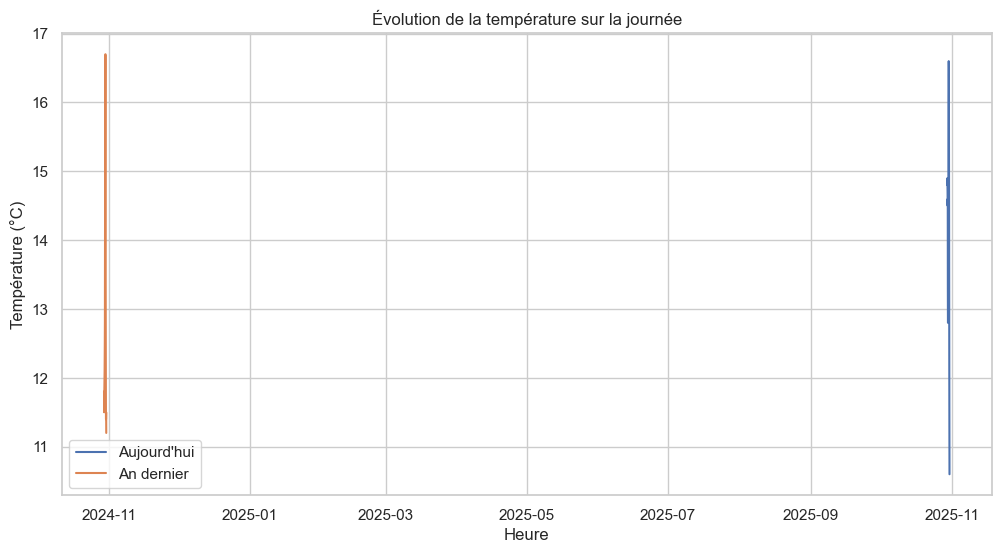

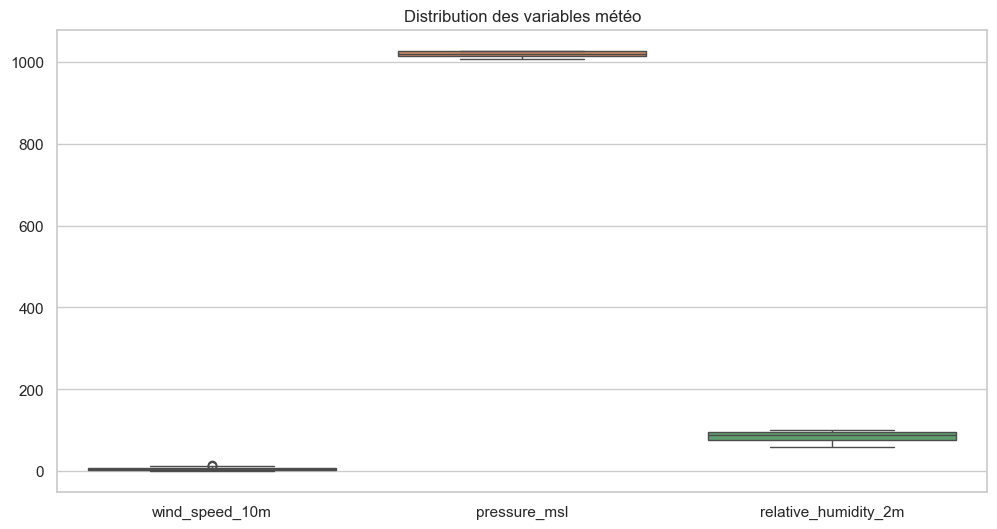

In [17]:
# Température au cours de la journée
plt.figure(figsize=(12,6))
plt.plot(df_today_hourly.index, df_today_hourly['temperature_2m'], label='Aujourd\'hui')
plt.plot(df_last_year_hourly.index, df_last_year_hourly['temperature_2m'], label='An dernier')
plt.xlabel("Heure")
plt.ylabel("Température (°C)")
plt.title("Évolution de la température sur la journée")
plt.legend()
plt.show()

# Boxplots pour vent, humidité, pression
plt.figure(figsize=(12,6))
sns.boxplot(data=pd.concat([df_today_hourly[['wind_speed_10m', 'pressure_msl', 'relative_humidity_2m']], 
                            df_last_year_hourly[['wind_speed_10m', 'pressure_msl', 'relative_humidity_2m']]]))
plt.title("Distribution des variables météo")
plt.show()

##################En gros il n'y a rien qui change#######################""


Stats inf

In [ ]:
t_temp, p_temp = stats.ttest_ind(df_today_hourly['temperature_2m'], df_last_year_hourly['temperature_2m'], equal_var=False)
t_vent, p_vent = stats.ttest_ind(df_today_hourly['wind_speed_10m'], df_last_year_hourly['wind_speed_10m'], equal_var=False)

print(f"Test t température → t={t_temp:.3f}, p={p_temp:.3f}")
print(f"Test t vent → t={t_vent:.3f}, p={p_vent:.3f}")

#le t test est un test de moyenne entre 2 groupe ici entre les 2 années, aujourd'hui et le meme jour l'an dernier
#nous avons 2 Hypothèses. H0 = Hypothèse nulle moyenne aujourd'hui = moyenne l'an dernier et H1 c'est l'inverse
#Analysons nos résultats a date du 30/10, sous reserve de changement a relance du code

# Température : avec un risque alpha à 5%. la p-value etant a 0,016 donc en dessous de 0,05 on rejette H0
#Donc il y a une difference significative entre la température d'aujoud'hui etcelle de l'an dernier

#Vent : Risque de 5%, p-value de 0,002 même interpretation que température


Test t température → t=2.514, p=0.016
Test t vent → t=3.472, p=0.002


Analyse multivariée (ACP)


Variance expliquée par PC1 et PC2 : [0.6227 0.2074]
PC1: 62.27%  -  PC2: 20.74%



,PC1_loading,PC2_loading,contrib_PC1_pct,contrib_PC2_pct
temperature_2m,-0.502,-0.460,25.235,24.281
pressure_msl,0.523,-0.292,26.282,15.386
relative_humidity_2m,0.546,0.415,27.434,21.896
wind_speed_10m,-0.419,0.729,21.049,38.437


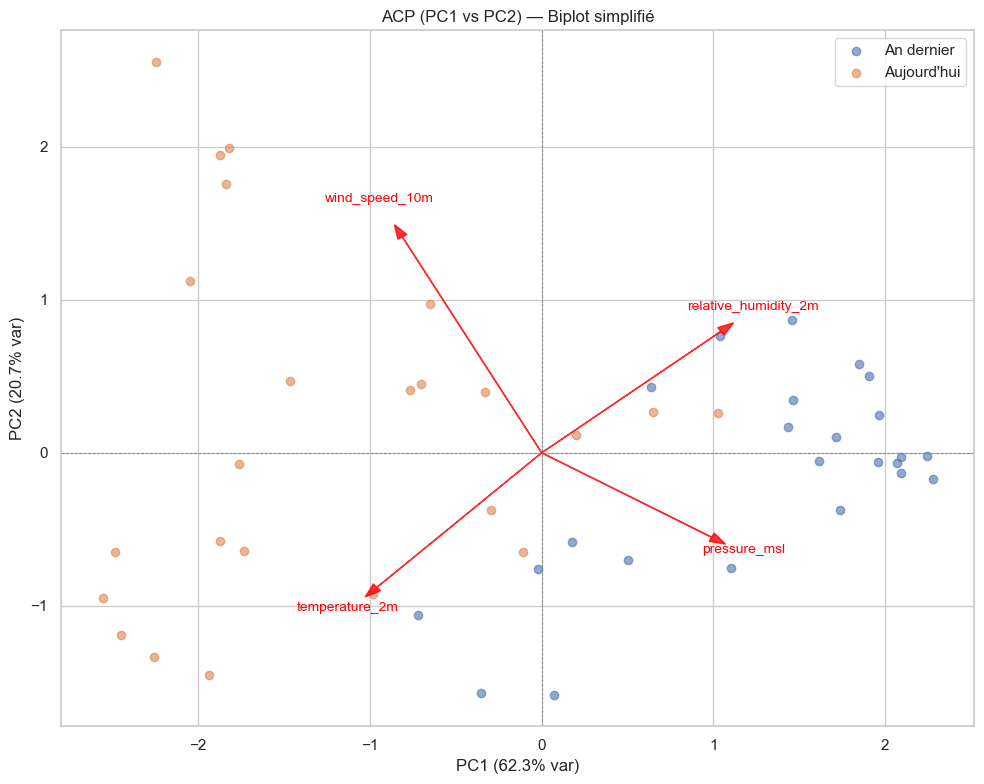

In [ ]:
variables = ['temperature_2m', 'pressure_msl', 'relative_humidity_2m', 'wind_speed_10m']
# Concaténer verticalement (observations)
df_combined = pd.concat([df_today_hourly[variables], df_last_year_hourly[variables]], axis=0)

# nettoyer les lignes avec NA sur ces variables (pour ne pas casser la standardisation/PCA)
df_combined = df_combined.dropna(how='any').reset_index(drop=True)

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_combined)

# PCA
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
explained = pca.explained_variance_ratio_

print("Variance expliquée par PC1 et PC2 :", np.round(explained, 4))
print(f"PC1: {explained[0]*100:.2f}%  -  PC2: {explained[1]*100:.2f}%\n")

# tableau de contributions (loadings) - importance des variables sur chaque composante
loadings = pd.DataFrame(pca.components_.T, index=variables, columns=['PC1_loading', 'PC2_loading'])
# contribution (%) par variable pour chaque PC (en valeur absolue normalisée)
loadings['contrib_PC1_pct'] = 100 * (loadings['PC1_loading'].abs() / loadings['PC1_loading'].abs().sum())
loadings['contrib_PC2_pct'] = 100 * (loadings['PC2_loading'].abs() / loadings['PC2_loading'].abs().sum())
display(loadings.round(3))

# --- Biplot ---
plt.figure(figsize=(10,8))
# couleur par source (aujourd'hui vs an dernier) : on remap depuis la concat utilisée plus tôt
n_today = len(df_today_hourly[variables].dropna())
# si après dropna la longueur a changé, on prend la proportion en gardant l'ordre concat [today, last]
labels = np.array(['Aujourd\'hui'] * n_today + ['An dernier'] * (len(df_combined) - n_today))
# but si n_today > len(df_combined) (cas rare), on recalcule plus prudent :
if len(labels) != len(components):
    # fallback heuristique : répartir proportionnellement
    half = len(components)//2
    labels = np.array(['Aujourd\'hui'] * half + ['An dernier'] * (len(components)-half))

# scatter
unique_labels = np.unique(labels)
palette = {'Aujourd\'hui':'tab:blue', 'An dernier':'tab:orange'}
for lab in unique_labels:
    mask = labels == lab
    plt.scatter(components[mask,0], components[mask,1], label=lab, alpha=0.6)

# flèches (loadings) : on scale pour que les flèches soient visibles par rapport aux points
arrow_scale = max(components.max(), -components.min()) * 0.8
for i, var in enumerate(variables):
    x_loading = pca.components_[0, i]
    y_loading = pca.components_[1, i]
    plt.arrow(0, 0, x_loading * arrow_scale, y_loading * arrow_scale,
              color='red', alpha=0.8, head_width=0.03*arrow_scale, length_includes_head=True)
    plt.text(x_loading * arrow_scale * 1.1, y_loading * arrow_scale * 1.1, var, color='red', fontsize=10, ha='center')

plt.xlabel(f"PC1 ({explained[0]*100:.1f}% var)")
plt.ylabel(f"PC2 ({explained[1]*100:.1f}% var)")
plt.title("ACP (PC1 vs PC2) — Biplot simplifié")
plt.axhline(0, color='grey', linestyle='--', linewidth=0.6)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.6)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Interpretation Tableau : 
#Les 2 premiers axes explique environ 80 % de la variances ce qui est énorme
"""PC1

Les contributions sont assez équilibrées (environ 25 % chacune) toutes les variables participent à cette dimension.
Les signes opposés indiquent des corrélations inverses :
Température (−) et Humidité/Pression (+)
Quand il fait chaud, l’humidité et la pression baissent (relation typique).

PC2

Vent domine (38 %) c’est la variable la plus discriminante du second axe.
Température et humidité y participent aussi un peu (environ 20–25 %)""""

#Interpretation Graph :

# Les points situés à gauche du graphique (PC1 négatif) correspondent à des conditions plus chaudes et sèches.
#Les points à droite (PC1 positif) traduisent des conditions plus humides et à pression élevée.
#Les points vers le haut (PC2 positif) signalent des vents forts, tandis que vers le bas, c’est plus calme.

#Cette ACP montre une différence saisonnière nette entre la journée actuelle et la même journée l’année passée :

#Aujourd’hui : conditions plus chaudes, plus sèches, et légèrement plus venteuses.
#An dernier : conditions plus humides et stables (pression plus forte).

Alerte caicule

In [20]:
def detecter_alerte_canicule(df, temperature_col='temperature_2m', seuil=35):
    """
    Détecte les heures où la température dépasse un seuil critique (canicule).

    Paramètres :
    ------------
    df : DataFrame
        Données météo horaires ou journalières.
    temperature_col : str
        Nom de la colonne contenant la température.
    seuil : float
        Température seuil en °C pour déclencher une alerte.

    Retour :
    --------
    list[dict]
        Liste de dictionnaires contenant les alertes détectées.
    """
    alertes = []

    if temperature_col not in df.columns:
        print(f"⚠️ Colonne '{temperature_col}' introuvable dans le DataFrame.")
        return []

    # Parcourt des valeurs de température
    for index, temp in df[temperature_col].items():
        if temp > seuil:
            alerte = {
                "type": "Canicule",
                "valeur": round(temp, 1),
                "date": str(index),
                "niveau": "Alerte Rouge 🔴" if temp > seuil + 5 else "Alerte Orange 🟠"
            }
            alertes.append(alerte)

    # Affichage des résultats
    if alertes:
        print(f"🚨 {len(alertes)} alerte(s) canicule détectée(s) :\n")
        for a in alertes:
            print(f"{a['date']} → {a['valeur']}°C ({a['niveau']})")
    else:
        print(f"✅ Aucune alerte canicule détectée (toutes les températures ≤ {seuil}°C)")

    return alertes


In [21]:
# Exemple avec ton DataFrame horaire d'aujourd'hui
alertes_canicule = detecter_alerte_canicule(df_today_hourly, 'temperature_2m', seuil=35)


✅ Aucune alerte canicule détectée (toutes les températures ≤ 35°C)
